# Assigment 3: Applying Linear Regression on Multidimensional Data with Linear Algebra

by Anchalee P Ramirez

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [2]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

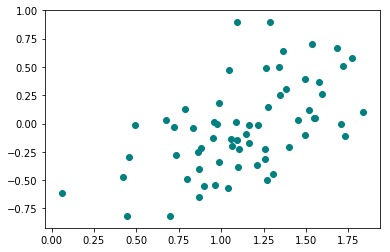

In [3]:
# Scatter plot of x1

plt.scatter(x.T[0], y, c='teal')

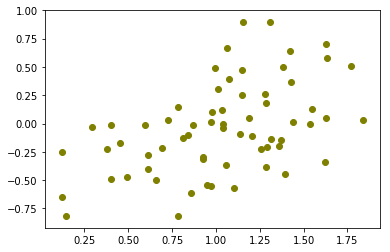

In [4]:
# Scatter plot of x2

plt.scatter(x.T[1], y, c='olive')

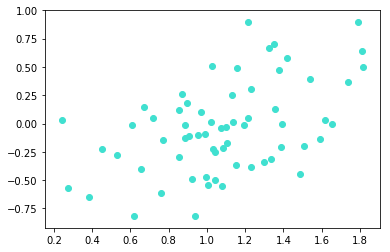

In [5]:
# Scatter plot of x3

plt.scatter(x.T[2], y, c='turquoise')

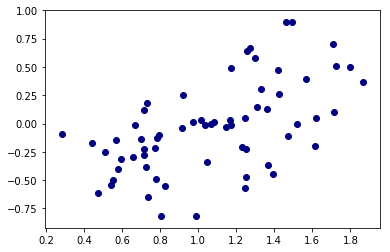

In [6]:
# Scatter plot of x4

plt.scatter(x.T[3], y, c='navy')

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

# $Beta = (X^T X)^{-1} Y^T X$

In [7]:
# Find beta by using equation

np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(y.T, x))

array([ 0.31186876,  0.07477219,  0.25084438,  0.29688126, -1.05988157])

In [8]:
# Find beta by using numpy leasy squares solver

beta = np.linalg.lstsq(x, y,rcond=None)[0]
beta

array([ 0.31186876,  0.07477219,  0.25084438,  0.29688126, -1.05988157])

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

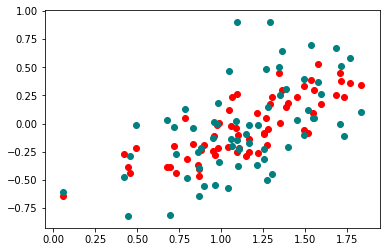

In [9]:
# Scatter plot of x1 and its predicted value

pred = np.dot(x, beta)
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='teal')

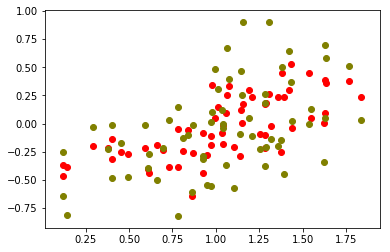

In [10]:
# Scatter plot of x2 and its predicted value

plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='olive')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [11]:
import pandas as pd

credit = pd.read_csv('C:/Users/Anchee/Desktop/MS Government Analytics JHU/Fall 2018 - Machine Learning and Neural Networks/mlnn-master/data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


#  (1) Rating = f(Income, Limit)

In [12]:
x1 = credit[['Income', 'Limit']].as_matrix()

x1= np.vstack([x1.T, np.ones(len(x1))]).T
x1

C:\Users\Anchee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1.48910e+01, 3.60600e+03, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 1.00000e+00]])

In [13]:
y = credit['Rating']
y[:5]

0    283
1    483
2    514
3    681
4    357
Name: Rating, dtype: int64

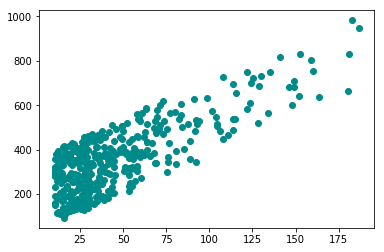

In [14]:
#Scatter plot of Income

plt.scatter(x1.T[0], y, c='darkcyan')

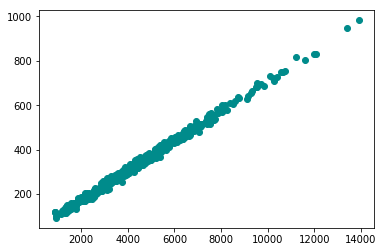

In [15]:
# Scatter plot of Limit

plt.scatter(x1.T[1], y, c='darkcyan')

In [16]:
# Slope of each variable

beta1 = np.linalg.lstsq(x1, y, rcond=None)[0]
beta1

array([2.07464217e-02, 6.65723378e-02, 3.87419069e+01])

# (2) Rating = f(Income, Age)

In [17]:
x2 = credit[['Income', 'Age']].as_matrix()

x2= np.vstack([x2.T, np.ones(len(x2))]).T
x2

C:\Users\Anchee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 14.891,  34.   ,   1.   ],
       [106.025,  82.   ,   1.   ],
       [104.593,  71.   ,   1.   ],
       ...,
       [ 57.872,  67.   ,   1.   ],
       [ 37.728,  44.   ,   1.   ],
       [ 18.701,  64.   ,   1.   ]])

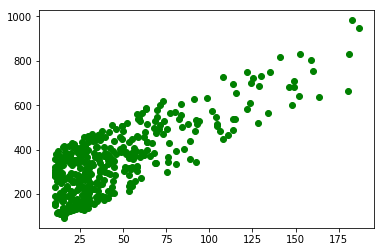

In [18]:
#Scatter plot of Income

plt.scatter(x2.T[0], y, c='green')

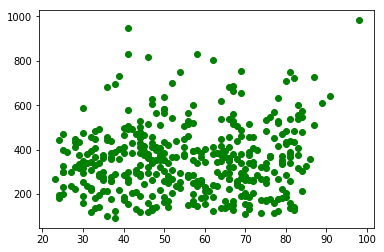

In [19]:
#Scatter plot of Age

plt.scatter(x2.T[1], y, c='green')

In [20]:
# Slope of each variable

beta2 = np.linalg.lstsq(x2, y, rcond=None)[0]
beta2

array([  3.50245506,  -0.32939018, 214.89921532])

# (3) Rating = f(Income, Balance)

In [21]:
x3 = credit[['Income', 'Balance']].as_matrix()

x3= np.vstack([x3.T, np.ones(len(x3))]).T
x3

C:\Users\Anchee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 14.891, 333.   ,   1.   ],
       [106.025, 903.   ,   1.   ],
       [104.593, 580.   ,   1.   ],
       ...,
       [ 57.872, 138.   ,   1.   ],
       [ 37.728,   0.   ,   1.   ],
       [ 18.701, 966.   ,   1.   ]])

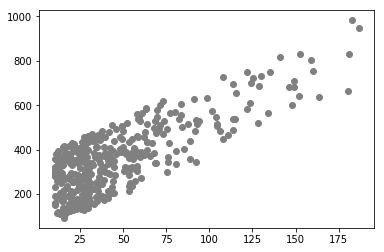

In [22]:
#Scatter plot of Income

plt.scatter(x3.T[0], y, c='grey')

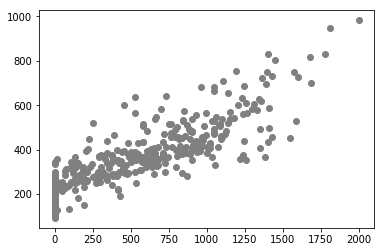

In [23]:
#Scatter plot of Balance

plt.scatter(x3.T[1], y, c='grey')

In [24]:
# Slope of each variable

beta3 = np.linalg.lstsq(x3, y, rcond=None)[0]
beta3

array([  2.1863064 ,   0.21293056, 145.35057611])

# (4) Rating = f(Limit, Balance)

In [25]:
x4 = credit[['Limit', 'Balance']].as_matrix()

x4= np.vstack([x4.T, np.ones(len(x4))]).T
x4

C:\Users\Anchee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[3.606e+03, 3.330e+02, 1.000e+00],
       [6.645e+03, 9.030e+02, 1.000e+00],
       [7.075e+03, 5.800e+02, 1.000e+00],
       ...,
       [4.171e+03, 1.380e+02, 1.000e+00],
       [2.525e+03, 0.000e+00, 1.000e+00],
       [5.524e+03, 9.660e+02, 1.000e+00]])

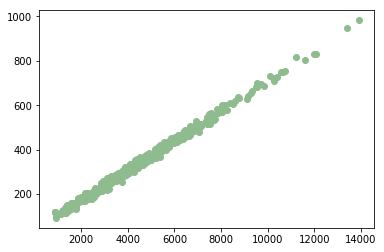

In [26]:
# Scatter plot of Limit

plt.scatter(x4.T[0], y, c='darkseagreen')

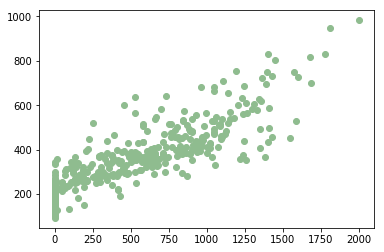

In [27]:
#Scatter plot of Balance

plt.scatter(x4.T[1], y, c='darkseagreen')

In [28]:
# Slope of each variable

beta4 = np.linalg.lstsq(x4, y,rcond=None)[0]
beta4

array([6.57875811e-02, 6.03409109e-03, 4.02585132e+01])

#  (5) Rating = f(Income, Limit, Age, Balance)

In [29]:
x5 = credit[['Income', 'Limit', 'Age', 'Balance']].as_matrix()

x5= np.vstack([x5.T, np.ones(len(x5))]).T
x5

C:\Users\Anchee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 6.70000e+01, 1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 4.40000e+01, 0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 6.40000e+01, 9.66000e+02, 1.00000e+00]])

In [30]:
# Slope of each variable

beta5 = np.linalg.lstsq(x5, y, rcond=None)[0]
beta5

array([1.31880513e-01, 6.26253800e-02, 3.19381468e-02, 1.50244935e-02,
       4.28168820e+01])

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

# (1) Rating = f(Income, Limit)

In [31]:
# Predicted values of Income and Limit

pred1 = np.dot(x1, beta1)

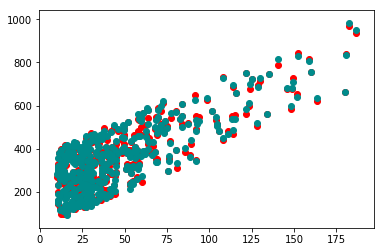

In [32]:
# Scatter plot of Income and its predicted value

plt.scatter(x1.T[0], pred1, c='red')
plt.scatter(x1.T[0], y, c='darkcyan')

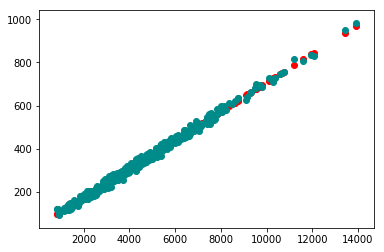

In [33]:
# Scatter plot of Limit and its predicted value

plt.scatter(x1.T[1], pred1, c='red')
plt.scatter(x1.T[1], y, c='darkcyan')

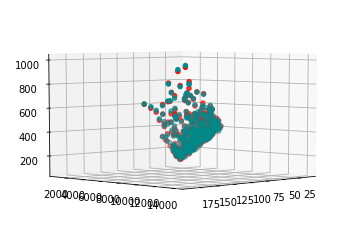

In [34]:
# Relationship between Rating, Income, and Limit

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5, 45)
ax.scatter(x1.T[0], x1.T[1], pred1, zdir='z', c='r')
ax.scatter(x1.T[0], x1.T[1], y, zdir='z', c='darkcyan')

# (2) Rating = f(Income, Age)

In [35]:
# Predicted values of Income and Age

pred2 = np.dot(x2, beta2)

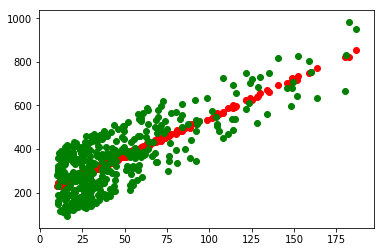

In [36]:
# Scatter plot of Income and its predicted value

plt.scatter(x2.T[0], pred2, c='red')
plt.scatter(x2.T[0], y, c='green')

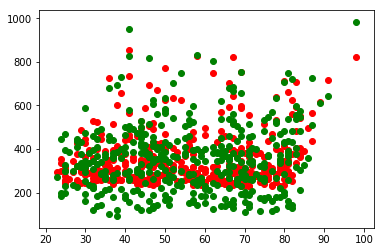

In [37]:
# Scatter plot of Age and its predicted value

plt.scatter(x2.T[1], pred2, c='red')
plt.scatter(x2.T[1], y, c='green')

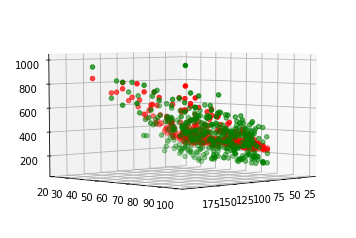

In [38]:
# Relationship between Rating, Income, and Age

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5, 45)
ax.scatter(x2.T[0], x2.T[1], pred2, zdir='z', c='r')
ax.scatter(x2.T[0], x2.T[1], y, zdir='z', c='green')

# (3) Rating = f(Income, Balance)

In [39]:
# Predicted values of Income and Balance

pred3 = np.dot(x3, beta3)

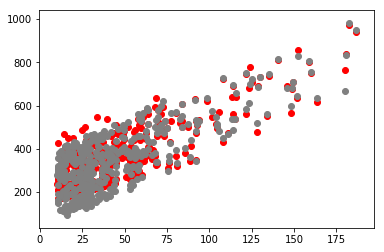

In [40]:
# Scatter plot of Income and its predicted value

plt.scatter(x3.T[0], pred3, c='red')
plt.scatter(x3.T[0], y, c='grey')

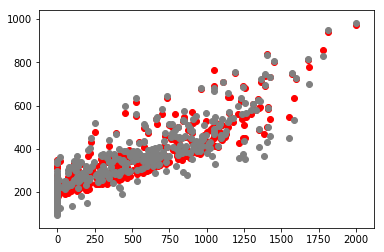

In [41]:
# Scatter plot of Balance and its predicted value

plt.scatter(x3.T[1], pred3, c='red')
plt.scatter(x3.T[1], y, c='grey')

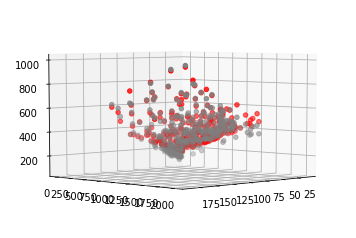

In [42]:
# Relationship between Rating, Income, and Balance

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5, 45)
ax.scatter(x3.T[0], x3.T[1], pred3, zdir='z', c='r')
ax.scatter(x3.T[0], x3.T[1], y, zdir='z', c='grey')

# (4) Rating = f(Limit, Balance)

In [43]:
# Predicted values of Limit and Balance

pred4 = np.dot(x4, beta4)

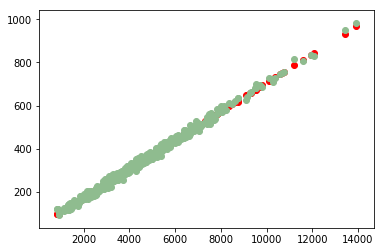

In [44]:
# Scatter plot of Limit and its predicted values

plt.scatter(x4.T[0], pred4, c='red')
plt.scatter(x4.T[0], y, c='darkseagreen')

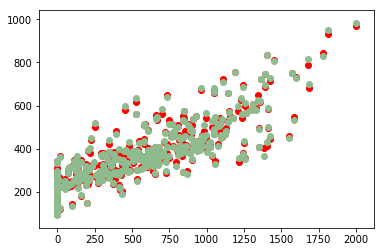

In [45]:
# Scatter plot of Balance and its predicted values

plt.scatter(x4.T[1], pred4, c='red')
plt.scatter(x4.T[1], y, c='darkseagreen')

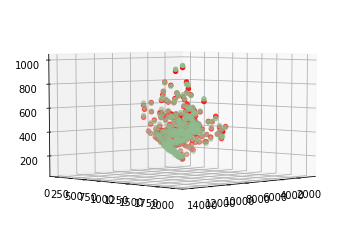

In [46]:
# Relationship between Rating, Limit, and Balance

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5, 45)
ax.scatter(x4.T[0], x4.T[1], pred4, zdir='z', c='r')
ax.scatter(x4.T[0], x4.T[1], y, zdir='z', c='darkseagreen')

# (5) Rating = f(Income, Limit, Age, Balance)

In [47]:
# Predicted values of Income, Limit, Age, and Balance

pred5 = np.dot(x5, beta5)

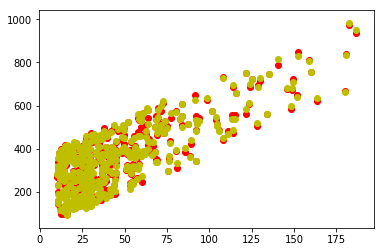

In [48]:
# Scatter plot of Income and its predicted value

plt.scatter(x5.T[0], pred5, c='red')
plt.scatter(x5.T[0], y, c='y')

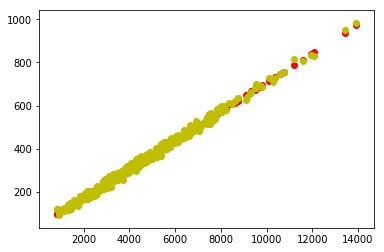

In [49]:
# Scatter plot of Limit and its predicted value

plt.scatter(x5.T[1], pred5, c='red')
plt.scatter(x5.T[1], y, c='y')

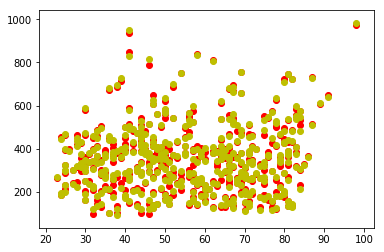

In [50]:
# Scatter plot of Age and its predicted value

plt.scatter(x5.T[2], pred5, c='red')
plt.scatter(x5.T[2], y, c='y')

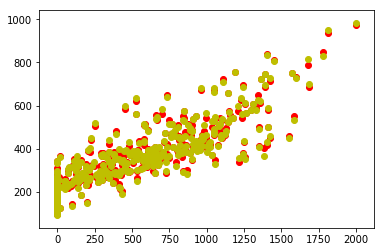

In [51]:
# Scatter plot of Balance and its predicted value

plt.scatter(x5.T[3], pred5, c='red')
plt.scatter(x5.T[3], y, c='y')